##  Home Medical Visit Analysis

In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in 
#Some libraries we required for this given below

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os##modules provide numerous tools to deal with filenames, paths, directories. ... These modules are wrappers for platform-specific modules, so functions like os. path. split work on UNIX, Windows, Mac OS, and any other platform supported by Python.


In [53]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#data in the form for zip file so imported zip file and the converted it into excel

# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "Hack18.xlsx (3).zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
Hack18.xlsx                                    2020-02-13 20:06:06      5988902
Extracting all the files now...
Done!


In [54]:
df=pd.read_excel("Hack18.xlsx")

In [55]:
df.head()

,estado,tiempo_demora,poblacion,id_poblacion,edad_valor,cp,latitude_corregida,longitud_corregida,patologia,created,Fecha,closed,id_tipo,id_personal,nasistencias,menor,Geopoint_corregido
0,4,60,Esplugas de Llobregat,103,37.0,8950.0,41.383650,2.091413,SINDROME VERTIGINOSO,2018-09-06 07:38:15,2018-09-06 07:39:16,2018-09-06 09:06:34,1,39,1,2,POINT(2.0914129333099787 41.38364980796948)
1,4,90,Castelldefels,94,83.0,8860.0,41.273739,1.988016,BNCO/EPOC CON EXACERBACION,2018-09-06 06:00:25,2018-09-06 06:01:04,2018-09-06 07:13:41,1,90,1,2,POINT(1.9880160000000158 41.27373945657561)
2,5,0,Castelldefels,94,83.0,8860.0,41.273739,1.986016,BNCO/EPOC CON EXACERBACION,2018-09-06 05:48:21,2018-09-06 05:56:55,NaN,1,90,1,2,POINT(1.9860160000000158 41.27373945657561)
3,4,60,Sabadell,22,43.0,8206.0,41.557789,2.100580,DOLOR ABDOMINAL,2018-09-06 01:00:25,2018-09-06 01:01:58,2018-09-06 02:44:09,1,101,1,2,POINT(2.1005795752206877 41.557788507357586)
4,4,90,Esplugas de Llobregat,103,1.0,8950.0,41.373981,2.100324,CATARRORESFRIADO,2018-09-05 23:56:29,2018-09-06 00:00:55,2018-09-06 00:47:06,1,90,1,1,POINT(2.1003244825148677 41.37398136886142)


In [56]:
df.columns

Index(['estado', 'tiempo_demora', 'poblacion', 'id_poblacion', 'edad_valor',
       'cp', 'latitude_corregida', 'longitud_corregida', 'patologia',
       'created', 'Fecha', 'closed', 'id_tipo', 'id_personal', 'nasistencias',
       'menor', 'Geopoint_corregido'],
      dtype='object')

In [57]:
##we remove the 2 columns created and closed it actually we do not required
data=df.drop(columns=['created','closed'])

In [58]:
##change the column names from spanish to english

english_columns = ['Visit_Status', 'Time_Delay', 'City', 'City_ID', 'Patient_Age', 'Zipcode', 'LAT', 'LON', 'Pathology', 'Date', 'ID_Type',
'ID_Personal', 'N_Home_Visits', 'Is_Patient_Minor', 'Geo_Point']

data.columns = english_columns
data.columns

Index(['Visit_Status', 'Time_Delay', 'City', 'City_ID', 'Patient_Age',
       'Zipcode', 'LAT', 'LON', 'Pathology', 'Date', 'ID_Type', 'ID_Personal',
       'N_Home_Visits', 'Is_Patient_Minor', 'Geo_Point'],
      dtype='object')

In [59]:
data.head()

,Visit_Status,Time_Delay,City,City_ID,Patient_Age,Zipcode,LAT,LON,Pathology,Date,ID_Type,ID_Personal,N_Home_Visits,Is_Patient_Minor,Geo_Point
0,4,60,Esplugas de Llobregat,103,37.0,8950.0,41.383650,2.091413,SINDROME VERTIGINOSO,2018-09-06 07:39:16,1,39,1,2,POINT(2.0914129333099787 41.38364980796948)
1,4,90,Castelldefels,94,83.0,8860.0,41.273739,1.988016,BNCO/EPOC CON EXACERBACION,2018-09-06 06:01:04,1,90,1,2,POINT(1.9880160000000158 41.27373945657561)
2,5,0,Castelldefels,94,83.0,8860.0,41.273739,1.986016,BNCO/EPOC CON EXACERBACION,2018-09-06 05:56:55,1,90,1,2,POINT(1.9860160000000158 41.27373945657561)
3,4,60,Sabadell,22,43.0,8206.0,41.557789,2.100580,DOLOR ABDOMINAL,2018-09-06 01:01:58,1,101,1,2,POINT(2.1005795752206877 41.557788507357586)
4,4,90,Esplugas de Llobregat,103,1.0,8950.0,41.373981,2.100324,CATARRORESFRIADO,2018-09-06 00:00:55,1,90,1,1,POINT(2.1003244825148677 41.37398136886142)


In [60]:
##we find out the how many missing values iun each column
missing = []
for column in data.columns:
    missing.append({'column': column, 'missing': data[column].isnull().sum()})
missing = pd.DataFrame.from_records(missing)
missing[missing.missing > 0]

,column,missing
4,Patient_Age,57
5,Zipcode,2
9,Date,1


In [61]:
# Not a lot of rows so we can just drop them
data.dropna(inplace=True, axis=0)

In [62]:
data.shape

(40051, 15)

In [63]:
data['Patient_Age'].value_counts()

 2.0      1619
 1.0      1593
 3.0      1486
 4.0      1174
 5.0      1073
          ... 
 97.0       28
 99.0       26
 98.0       17
 106.0       1
-5.0         1
Name: Patient_Age, Length: 102, dtype: int64

In [64]:
data['age_by_decade'] = pd.cut(x=data['Patient_Age'], bins=[20, 40, 60, 80, 110], labels=['child', 'youth', 'senior_citize', 'aged_peoples'])

In [65]:
data['age_by_decade'].value_counts()

youth            8706
child            7849
senior_citize    4041
aged_peoples     2541
Name: age_by_decade, dtype: int64

Text(0.5, 17.200000000000003, 'age_by_decade')

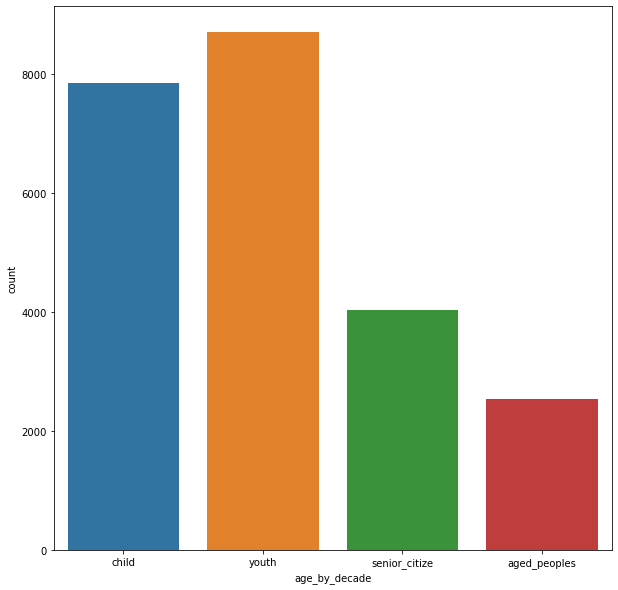

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,10))
sns.countplot(x='age_by_decade',data=data)
fig.set_xlabel("age_by_decade")

##### Response Time

Average wait time: 67.98494419614991 minutes


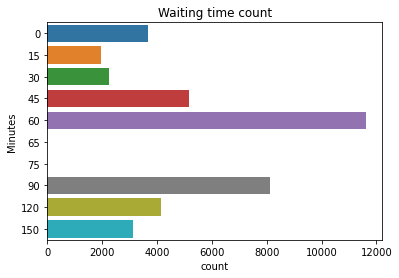

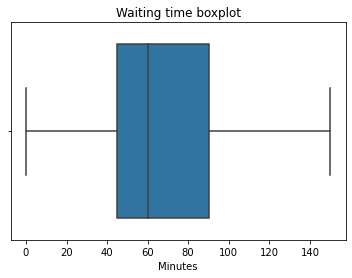

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Average wait time: {} minutes".format(data['Time_Delay'].mean()))
fig = sns.countplot(y="Time_Delay", data=data)
fig.set_title("Waiting time count")
fig.set_ylabel("Minutes")
plt.show()
fig = sns.boxplot(data['Time_Delay'])
fig.set_title("Waiting time boxplot")
fig.set_xlabel("Minutes")
plt.show()

### Handling the Data

In [68]:
##In this stage we convert our date from object to datetime
data.Date = pd.to_datetime(data.Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40051 entries, 0 to 40109
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Visit_Status      40051 non-null  int64         
 1   Time_Delay        40051 non-null  int64         
 2   City              40051 non-null  object        
 3   City_ID           40051 non-null  int64         
 4   Patient_Age       40051 non-null  float64       
 5   Zipcode           40051 non-null  float64       
 6   LAT               40051 non-null  float64       
 7   LON               40051 non-null  float64       
 8   Pathology         40051 non-null  object        
 9   Date              40051 non-null  datetime64[ns]
 10  ID_Type           40051 non-null  int64         
 11  ID_Personal       40051 non-null  int64         
 12  N_Home_Visits     40051 non-null  int64         
 13  Is_Patient_Minor  40051 non-null  int64         
 14  Geo_Point         4005

In [69]:
#Indexing the Data by its Dates
data_d = data.set_index(data.Date, append=False)
data_d.head()

,Visit_Status,Time_Delay,City,City_ID,Patient_Age,Zipcode,LAT,LON,Pathology,Date,ID_Type,ID_Personal,N_Home_Visits,Is_Patient_Minor,Geo_Point,age_by_decade
Date,,,,,,,,,,,,,,,,
2018-09-06 07:39:16,4,60,Esplugas de Llobregat,103,37.0,8950.0,41.383650,2.091413,SINDROME VERTIGINOSO,2018-09-06 07:39:16,1,39,1,2,POINT(2.0914129333099787 41.38364980796948),child
2018-09-06 06:01:04,4,90,Castelldefels,94,83.0,8860.0,41.273739,1.988016,BNCO/EPOC CON EXACERBACION,2018-09-06 06:01:04,1,90,1,2,POINT(1.9880160000000158 41.27373945657561),aged_peoples
2018-09-06 05:56:55,5,0,Castelldefels,94,83.0,8860.0,41.273739,1.986016,BNCO/EPOC CON EXACERBACION,2018-09-06 05:56:55,1,90,1,2,POINT(1.9860160000000158 41.27373945657561),aged_peoples
2018-09-06 01:01:58,4,60,Sabadell,22,43.0,8206.0,41.557789,2.100580,DOLOR ABDOMINAL,2018-09-06 01:01:58,1,101,1,2,POINT(2.1005795752206877 41.557788507357586),youth
2018-09-06 00:00:55,4,90,Esplugas de Llobregat,103,1.0,8950.0,41.373981,2.100324,CATARRORESFRIADO,2018-09-06 00:00:55,1,90,1,1,POINT(2.1003244825148677 41.37398136886142),NaN


In [70]:
import datetime
subset = data_d.between_time("20:13:00", "20:18:00")

In [71]:
subset

,Visit_Status,Time_Delay,City,City_ID,Patient_Age,Zipcode,LAT,LON,Pathology,Date,ID_Type,ID_Personal,N_Home_Visits,Is_Patient_Minor,Geo_Point,age_by_decade
Date,,,,,,,,,,,,,,,,
2018-09-05 20:14:37,4,60,Sant Antoni de Vilamajor,77,92.0,8459.0,41.674111,2.403712,TOS,2018-09-05 20:14:37,1,70,1,2,POINT(2.4037124028507773 41.67411059394657),aged_peoples
2018-09-03 20:17:12,4,60,Cornellà de Llobregat,99,35.0,8940.0,41.366047,2.065907,MAREO,2018-09-03 20:17:12,1,53,1,2,POINT(2.065906627947658 41.36604714829691),child
2018-09-02 20:14:10,4,90,Santa Maria de Palautordera,86,38.0,8460.0,41.666663,2.460264,CIATALGIA LE DEJARAN LA PUERTA ABIERTA PARA QU...,2018-09-02 20:14:10,1,95,1,2,POINT(2.4602635889549367 41.666663401610016),child
2018-08-27 20:14:51,4,60,Terrassa,43,5.0,8225.0,41.582380,2.006477,BRONQUITIS AGUDA,2018-08-27 20:14:51,1,70,1,1,POINT(2.006477184978976 41.58237962891686),NaN
2018-08-20 20:15:40,4,90,Cerdanyola,6,36.0,8290.0,41.483323,2.147137,MIGRAÑA COMUN,2018-08-20 20:15:40,1,80,1,2,POINT(2.1471370535105536 41.48332346088886),child
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-10-03 20:13:35,4,0,Sant Quirze,34,10.0,8192.0,41.543695,2.073353,AMIGDALITIS AGUDA,2015-10-03 20:13:35,1,20,1,1,POINT(2.073352689371566 41.54369502427459),NaN
2015-09-28 20:17:26,4,0,Sabadell,17,16.0,8201.0,41.548338,2.109724,FIEBRE,2015-09-28 20:17:26,1,29,1,2,POINT(2.109724287956585 41.54833810851755),NaN
2015-09-20 20:17:50,4,0,Cardedeu,57,3.0,8440.0,41.628967,2.369131,FIEBRE SEMCAT 2. SMS,2015-09-20 20:17:50,1,39,1,1,POINT(2.3691306151826432 41.62896654731955),NaN


In [72]:
##Recomended to Split into Years-Months-Days-Time
def split_date(df):
    df = df.copy()
    df['Year'] = pd.DatetimeIndex(df['Date']).year
    df['Month'] = pd.DatetimeIndex(df['Date']).month
    df['Day'] = pd.DatetimeIndex(df['Date']).day
    df['Time'] = pd.DatetimeIndex(df['Date']).time
    return df
data_s = split_date(data)
data_s.head(5)

,Visit_Status,Time_Delay,City,City_ID,Patient_Age,Zipcode,LAT,LON,Pathology,Date,ID_Type,ID_Personal,N_Home_Visits,Is_Patient_Minor,Geo_Point,age_by_decade,Year,Month,Day,Time
0,4,60,Esplugas de Llobregat,103,37.0,8950.0,41.383650,2.091413,SINDROME VERTIGINOSO,2018-09-06 07:39:16,1,39,1,2,POINT(2.0914129333099787 41.38364980796948),child,2018,9,6,07:39:16
1,4,90,Castelldefels,94,83.0,8860.0,41.273739,1.988016,BNCO/EPOC CON EXACERBACION,2018-09-06 06:01:04,1,90,1,2,POINT(1.9880160000000158 41.27373945657561),aged_peoples,2018,9,6,06:01:04
2,5,0,Castelldefels,94,83.0,8860.0,41.273739,1.986016,BNCO/EPOC CON EXACERBACION,2018-09-06 05:56:55,1,90,1,2,POINT(1.9860160000000158 41.27373945657561),aged_peoples,2018,9,6,05:56:55
3,4,60,Sabadell,22,43.0,8206.0,41.557789,2.100580,DOLOR ABDOMINAL,2018-09-06 01:01:58,1,101,1,2,POINT(2.1005795752206877 41.557788507357586),youth,2018,9,6,01:01:58
4,4,90,Esplugas de Llobregat,103,1.0,8950.0,41.373981,2.100324,CATARRORESFRIADO,2018-09-06 00:00:55,1,90,1,1,POINT(2.1003244825148677 41.37398136886142),NaN,2018,9,6,00:00:55


In [73]:
### You can filter more freely:
data_s[data_s['Year'] == 2016][data_s['Month'] == 2][data_s['Day'] == 20][data_s['Time'] <= datetime.time(17,25,30)]

<ipython-input-73-fb716b553d5d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_s[data_s['Year'] == 2016][data_s['Month'] == 2][data_s['Day'] == 20][data_s['Time'] <= datetime.time(17,25,30)]


,Visit_Status,Time_Delay,City,City_ID,Patient_Age,Zipcode,LAT,LON,Pathology,Date,ID_Type,ID_Personal,N_Home_Visits,Is_Patient_Minor,Geo_Point,age_by_decade,Year,Month,Day,Time
36452,4,60,Martorell,106,60.0,8760.0,41.489565,1.915423,LUMBALGIA AGUDA,2016-02-20 17:02:19,1,40,1,2,POINT(1.9154231640313868 41.48956476602804),youth,2016,2,20,17:02:19
36453,4,15,La Garriga,67,5.0,8530.0,41.693293,2.287057,FIEBRE,2016-02-20 16:49:10,1,27,1,1,POINT(2.2870572427145195 41.693293376074806),NaN,2016,2,20,16:49:10
36454,4,60,Vacarises,48,1.0,8233.0,41.615237,1.870262,VIRIASIS,2016-02-20 16:43:13,1,9,1,1,POINT(1.8702618673322238 41.61523668942239),NaN,2016,2,20,16:43:13
36455,4,30,Sant Cugat,26,23.0,8173.0,41.463890,2.074976,GRIPE ( sindrome gripal ) pc smc1,2016-02-20 16:22:11,1,40,1,2,POINT(2.074976238415367 41.46388953788448),child,2016,2,20,16:22:11
36456,4,30,Terrassa,40,38.0,8222.0,41.567220,2.026935,VIRIASIS VISITA DOBLE CON JOAN HERNANDEZ RUBIO,2016-02-20 15:23:29,1,40,1,2,POINT(2.0269348798970066 41.56721957863326),child,2016,2,20,15:23:29
36457,4,30,Terrassa,40,40.0,8222.0,41.572220,2.023935,GRIPE ( sindrome gripal )VISITA DOBLE CON GLOR...,2016-02-20 15:21:53,1,40,1,2,POINT(2.0239348798970065 41.57221957863325),child,2016,2,20,15:21:53
36458,4,15,Granollers,64,1.0,8402.0,41.615137,2.288171,BRONQUITIS AGUDA,2016-02-20 15:14:03,1,27,1,1,POINT(2.2881710309309113 41.61513665528882),NaN,2016,2,20,15:14:03
36459,4,30,Sant Cugat,131,71.0,8172.0,41.472670,2.091330,FIEBRE,2016-02-20 15:11:43,1,40,1,2,POINT(2.0913300000000463 41.47267000000008),senior_citize,2016,2,20,15:11:43
36460,4,15,Llinars del Vallès,71,57.0,8450.0,41.638490,2.397921,GRIPE,2016-02-20 14:30:10,1,27,1,2,POINT(2.3979214365803196 41.638490091869116),youth,2016,2,20,14:30:10
36461,4,45,Terrassa,42,68.0,8224.0,41.572214,2.012053,GRIPE,2016-02-20 14:07:26,1,9,1,2,POINT(2.012052837353608 41.57221375437128),senior_citize,2016,2,20,14:07:26
